<a href="https://colab.research.google.com/github/tchintchie/stocks/blob/master/Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import pandas_datareader as web
from matplotlib import style
style.use("ggplot")

In [75]:
df = web.get_data_yahoo("GOOGL")

In [76]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-08,548.280029,541.200012,545.599976,541.700012,1383100,541.700012
2015-07-09,548.880005,544.619995,548.650024,544.650024,1488300,544.650024
2015-07-10,559.289978,552.000000,553.710022,556.109985,2171800,556.109985
2015-07-13,572.849976,558.700012,559.510010,571.729980,2089600,571.729980
2015-07-14,589.710022,574.169983,574.500000,584.179993,3741600,584.179993


In [77]:
df["hl_pct"] = (df.High - df.Low)/df.Low*100

In [78]:
df["pct_change"] = (df["Adj Close"] - df.Open)/df.Open*100

In [79]:
df = df[["Adj Close","hl_pct", "pct_change", "Volume"]]
df.head()

,Adj Close,hl_pct,pct_change,Volume
Date,,,,
2015-07-08,541.700012,1.308207,-0.714803,1383100
2015-07-09,544.650024,0.782199,-0.729062,1488300
2015-07-10,556.109985,1.320648,0.433433,2171800
2015-07-13,571.729980,2.532659,2.184049,2089600
2015-07-14,584.179993,2.706522,1.684942,3741600


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
import math

In [81]:
forecast_col = "Adj Close"
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

In [82]:
forecast_out

13

In [83]:
df["label"] = df[forecast_col].shift(-forecast_out)

In [84]:
df.head(15)

,Adj Close,hl_pct,pct_change,Volume,label
Date,,,,,
2015-07-08,541.700012,1.308207,-0.714803,1383100,658.270020
2015-07-09,544.650024,0.782199,-0.729062,1488300,659.659973
2015-07-10,556.109985,1.320648,0.433433,2171800,661.429993
2015-07-13,571.729980,2.532659,2.184049,2089600,664.559998
2015-07-14,584.179993,2.706522,1.684942,3741600,657.500000
2015-07-15,583.960022,1.461536,0.037693,2073300,664.719971
2015-07-16,601.780029,2.820115,2.083126,5632100,661.280029
2015-07-17,699.619995,3.687316,2.885293,12858100,673.289978
2015-07-20,692.840027,2.351228,0.560255,5121800,670.150024


In [85]:
features = df.drop(["label"], axis = 1)
scaler = StandardScaler()
features = scaler.fit_transform(features)
features_lately = features[-forecast_out:]
features = features[:-forecast_out]

df.dropna(inplace=True)
target = df.label

In [86]:
print("features: ", features.shape)
print("target: ", target.shape)

features:  (1244, 4)
target:  (1244,)


In [87]:
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2)

In [88]:
print("train_features: ", train_features.shape)
print("test_features: ", test_features.shape)
print("train_target: ", train_target.shape)
print("test_target: ", test_target.shape)

train_features:  (995, 4)
test_features:  (249, 4)
train_target:  (995,)
test_target:  (249,)


In [89]:
model = SVR()
model.fit(train_features, train_target)
score = model.score(test_features, test_target)

In [90]:
score

0.6072723034991604

In [91]:
linreg = LinearRegression()
linreg.fit(train_features, train_target)
lin_score = linreg.score(test_features, test_target)

In [92]:
lin_score

0.9451538499675711

In [93]:
# testing different kernels for svr
for k in ["linear", "poly", "rbf","sigmoid"]:
  clf = SVR(kernel = k)
  clf.fit(train_features, train_target)
  score = clf.score(test_features, test_target)
  print(k, score)

linear 0.9441478219190593
poly 0.38956090355363077
rbf 0.6072723034991604
sigmoid 0.8431791729481678


In [94]:
forecast_set = model.predict(features_lately)
print(forecast_set, score, forecast_out)

[1171.41262672 1172.98373102 1151.23728958 1120.48535499 1127.63481624
 1154.79172422 1087.81357476 1170.23962317 1028.64618537 1073.8980846
 1126.08711017 1124.77443394 1100.08258011] 0.8431791729481678 13


In [95]:
df["forecast"] = np.nan

In [96]:
df.head()

,Adj Close,hl_pct,pct_change,Volume,label,forecast
Date,,,,,,
2015-07-08,541.700012,1.308207,-0.714803,1383100,658.270020,NaN
2015-07-09,544.650024,0.782199,-0.729062,1488300,659.659973,NaN
2015-07-10,556.109985,1.320648,0.433433,2171800,661.429993,NaN
2015-07-13,571.729980,2.532659,2.184049,2089600,664.559998,NaN
2015-07-14,584.179993,2.706522,1.684942,3741600,657.500000,NaN


In [97]:
last_day = df.iloc[-1].name
last_unix = last_day.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [98]:
for i in forecast_set:
  next_date = dt.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [99]:
df.tail()

,Adj Close,hl_pct,pct_change,Volume,label,forecast
Date,,,,,,
2020-06-24,NaN,NaN,NaN,NaN,NaN,1028.646185
2020-06-25,NaN,NaN,NaN,NaN,NaN,1073.898085
2020-06-26,NaN,NaN,NaN,NaN,NaN,1126.087110
2020-06-27,NaN,NaN,NaN,NaN,NaN,1124.774434
2020-06-28,NaN,NaN,NaN,NaN,NaN,1100.082580


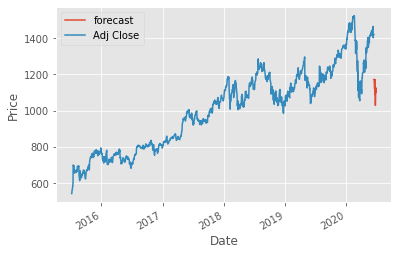

In [100]:
df.forecast.plot()
df["Adj Close"].plot()
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()